In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
from scipy.io import loadmat 
m = loadmat("/Users/mac/Desktop/数据科学导论作业/chp 11/1203 autoencoder-20191203/ex7faces.mat") 

In [22]:
data = np.array(m["X"])
y = [int(np.random.uniform()*250) for i in range(1,5001)]
dataset = [0,0]
dataset[0] = data
dataset[1] = np.array(y)

In [23]:
# Dataset parameters.
num_features = 1024 # data features (img shape: 32*32).

# Training parameters.
learning_rate = 0.01
training_steps = 20000
batch_size = 200
display_step = 1000

# Network Parameters
num_hidden_1 = 300 # 1st layer num features.
num_hidden_2 = 100 # 2nd layer num features (the latent dim).

In [24]:
(x_train, y_train)=dataset
# Convert to float32.
x_train =  x_train.astype(np.float32)

x_train = x_train/200.

In [25]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(10000).batch(batch_size).prefetch(1)


In [26]:
# A random value generator to initialize weights.
random_normal = tf.initializers.RandomNormal()

weights = {
    'encoder_h1': tf.Variable(random_normal([num_features, num_hidden_1])),
    'encoder_h2': tf.Variable(random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(random_normal([num_hidden_1, num_features])),
}
biases = {
    'encoder_b1': tf.Variable(random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(random_normal([num_features])),
}

In [27]:
# Building the encoder.
def encoder(x):
    # Encoder Hidden layer with sigmoid activation.
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation.
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),  biases['encoder_b2']))
    return layer_2


# Building the decoder.
def decoder(x):
    # Decoder Hidden layer with sigmoid activation.
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation.
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),  biases['decoder_b2']))
    return layer_2

In [28]:
# Mean square loss between original images and reconstructed ones.
def mean_square(reconstructed, original):
    return tf.reduce_mean(tf.pow(original - reconstructed, 2))

# Adam optimizer.
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

In [29]:
encoded=None
# Optimization process. 
def run_optimization(x):
    # Wrap computation inside a GradientTape for automatic differentiation.
    global encoded
    with tf.GradientTape() as g:
        encoded=encoder(x)
        reconstructed_image = decoder(encoded)
        loss = mean_square(reconstructed_image, x)

    # Variables to update, i.e. trainable variables.
    trainable_variables =[]
    for e in weights.values(): trainable_variables.append(e)
    for e in biases.values(): trainable_variables.append(e)
    
    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    return loss

In [30]:
# Run training for the given number of steps.
for step, (batch_x, _) in enumerate(train_data.take(training_steps + 1)):
    
    # Run the optimization.
    loss = run_optimization(batch_x)
    
    if step % display_step == 0:
        print("step: %i, loss: %f" % (step, loss))

step: 0, loss: 0.311152
step: 1000, loss: 0.034306
step: 2000, loss: 0.030093
step: 3000, loss: 0.027621
step: 4000, loss: 0.028433
step: 5000, loss: 0.028713
step: 6000, loss: 0.026330
step: 7000, loss: 0.027926
step: 8000, loss: 0.027798
step: 9000, loss: 0.027074
step: 10000, loss: 0.028419
step: 11000, loss: 0.028414
step: 12000, loss: 0.026885
step: 13000, loss: 0.027188
step: 14000, loss: 0.027490
step: 15000, loss: 0.026226
step: 16000, loss: 0.028170
step: 17000, loss: 0.027100
step: 18000, loss: 0.024700
step: 19000, loss: 0.027533
step: 20000, loss: 0.028893


In [31]:
# Testing and Visualization.
import matplotlib.pyplot as plt

In [32]:
encoded[0]

<tf.Tensor: id=4224199, shape=(100,), dtype=float32, numpy=
array([2.70580828e-01, 7.64851451e-01, 2.75668800e-01, 1.00199521e-01,
       9.99989688e-01, 2.03932881e-01, 7.43972600e-01, 5.59459805e-01,
       3.90410423e-06, 3.79023492e-01, 9.35792923e-06, 9.98387337e-01,
       5.97472191e-02, 1.63192481e-01, 2.69564390e-01, 9.24695849e-01,
       3.46910655e-01, 4.15801048e-01, 5.41170239e-02, 2.23942518e-01,
       7.10404396e-01, 1.27784252e-01, 4.28159714e-01, 7.43912458e-01,
       3.72416914e-01, 1.13159686e-01, 8.18425179e-01, 2.61604130e-01,
       6.27607226e-01, 2.25831479e-01, 9.27526832e-01, 5.28019190e-01,
       9.54486907e-01, 2.63685286e-02, 5.45379102e-01, 7.12862551e-01,
       9.99998212e-01, 1.00000000e+00, 7.80406237e-01, 1.72344744e-02,
       1.69617712e-01, 9.99982238e-01, 2.37433016e-02, 9.99915361e-01,
       8.40201974e-01, 4.60180640e-03, 2.87743777e-01, 7.18610287e-02,
       3.90684098e-01, 5.95002353e-01, 3.29771936e-01, 2.70414174e-01,
       1.95713222

In [33]:
i=0

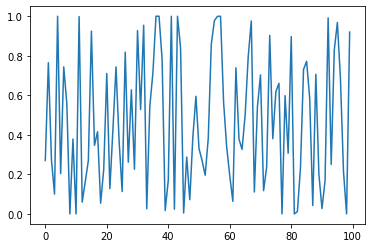

In [34]:
plt.plot(encoded[i]);i+=1

Original Images


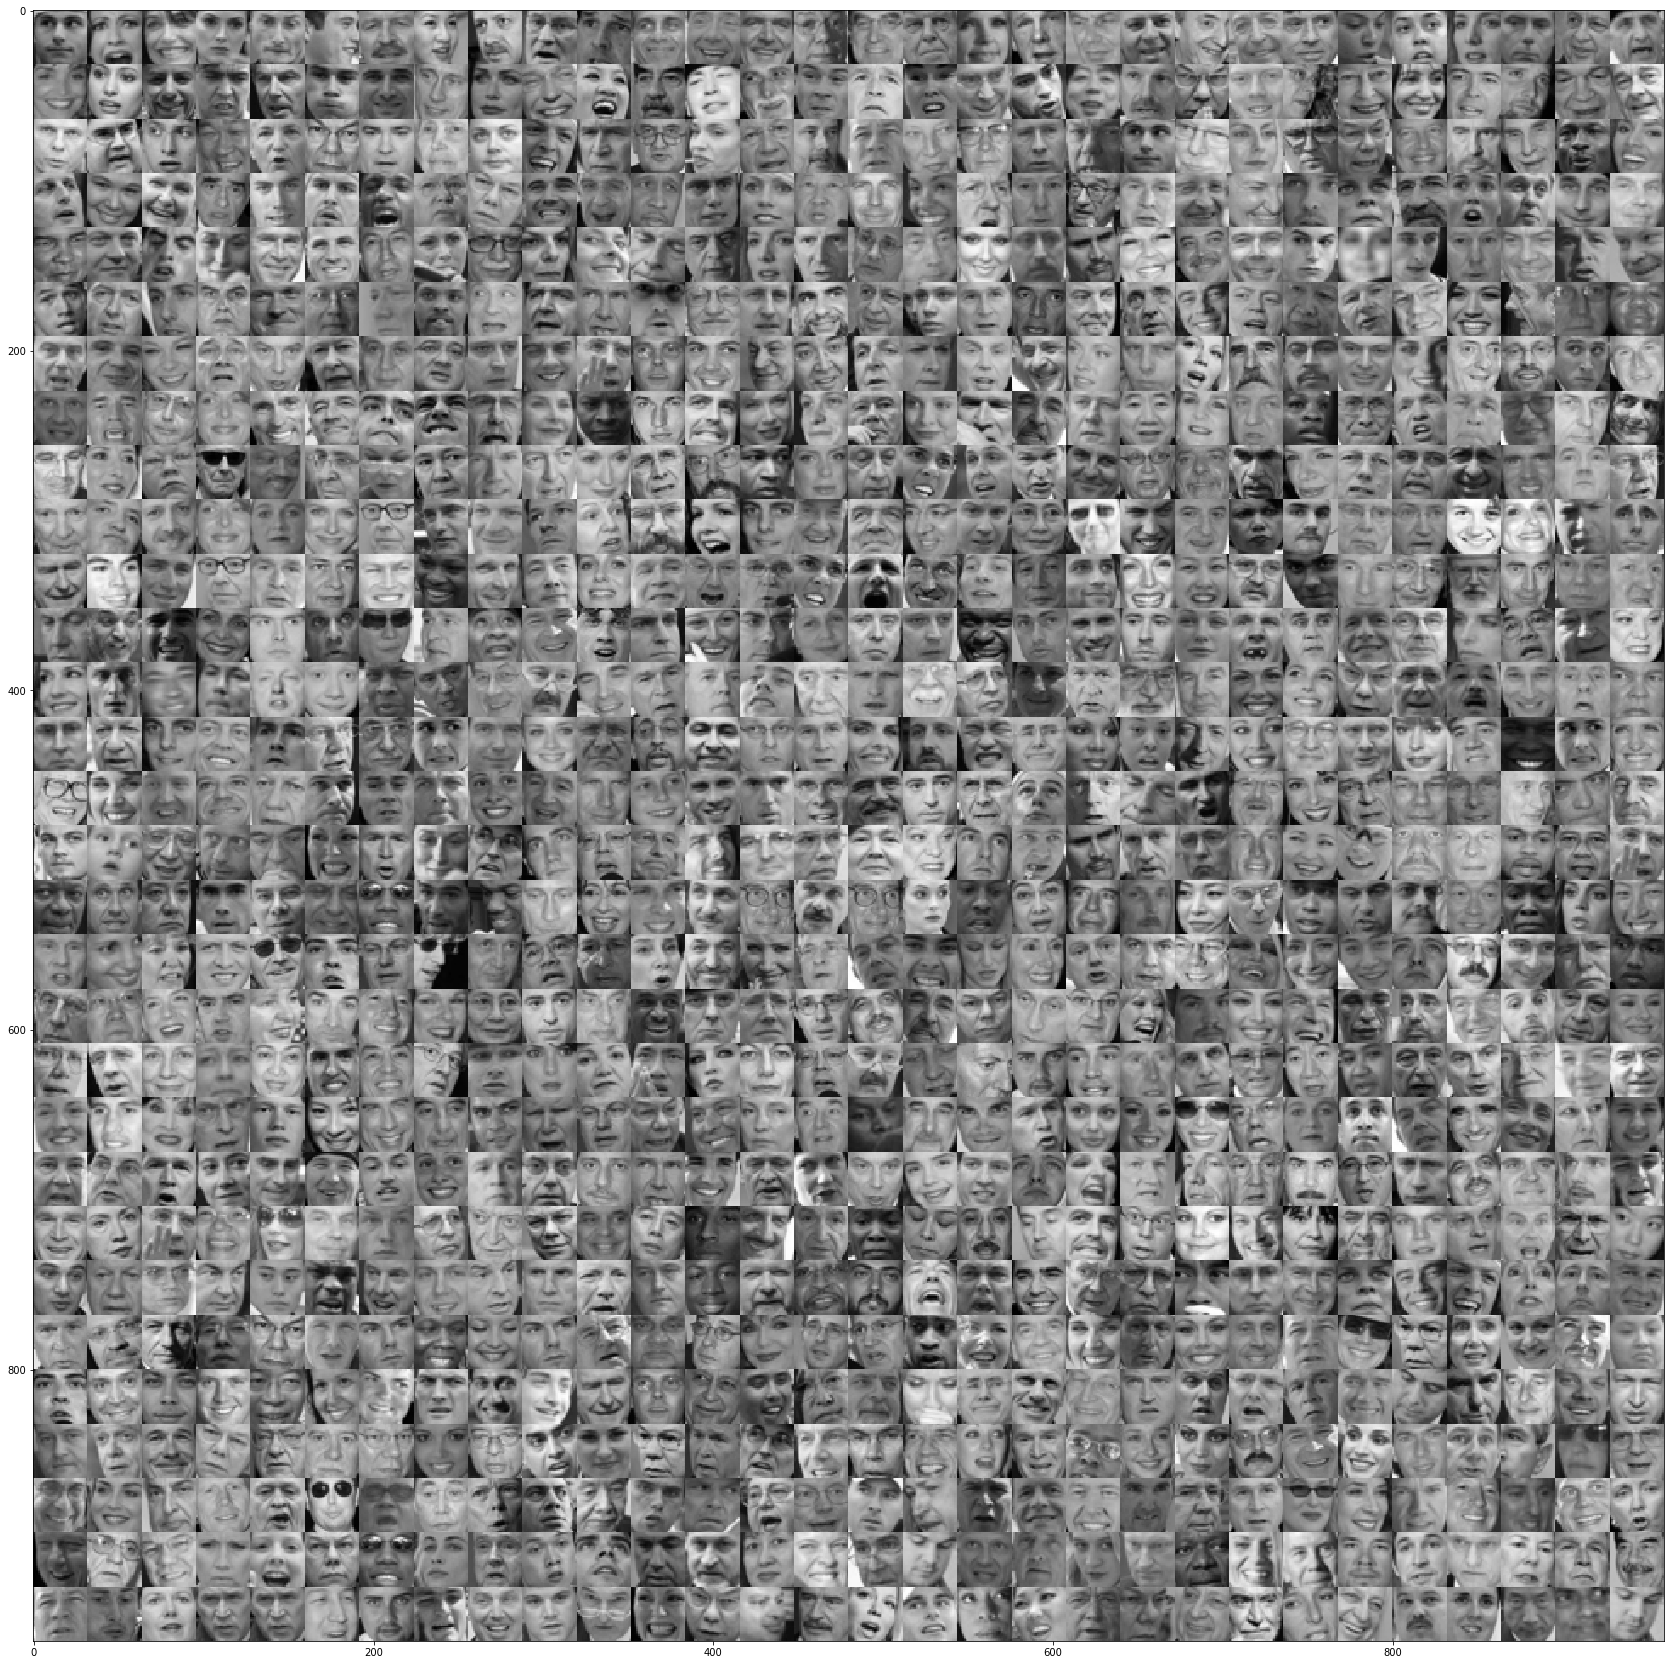

Reconstructed Images


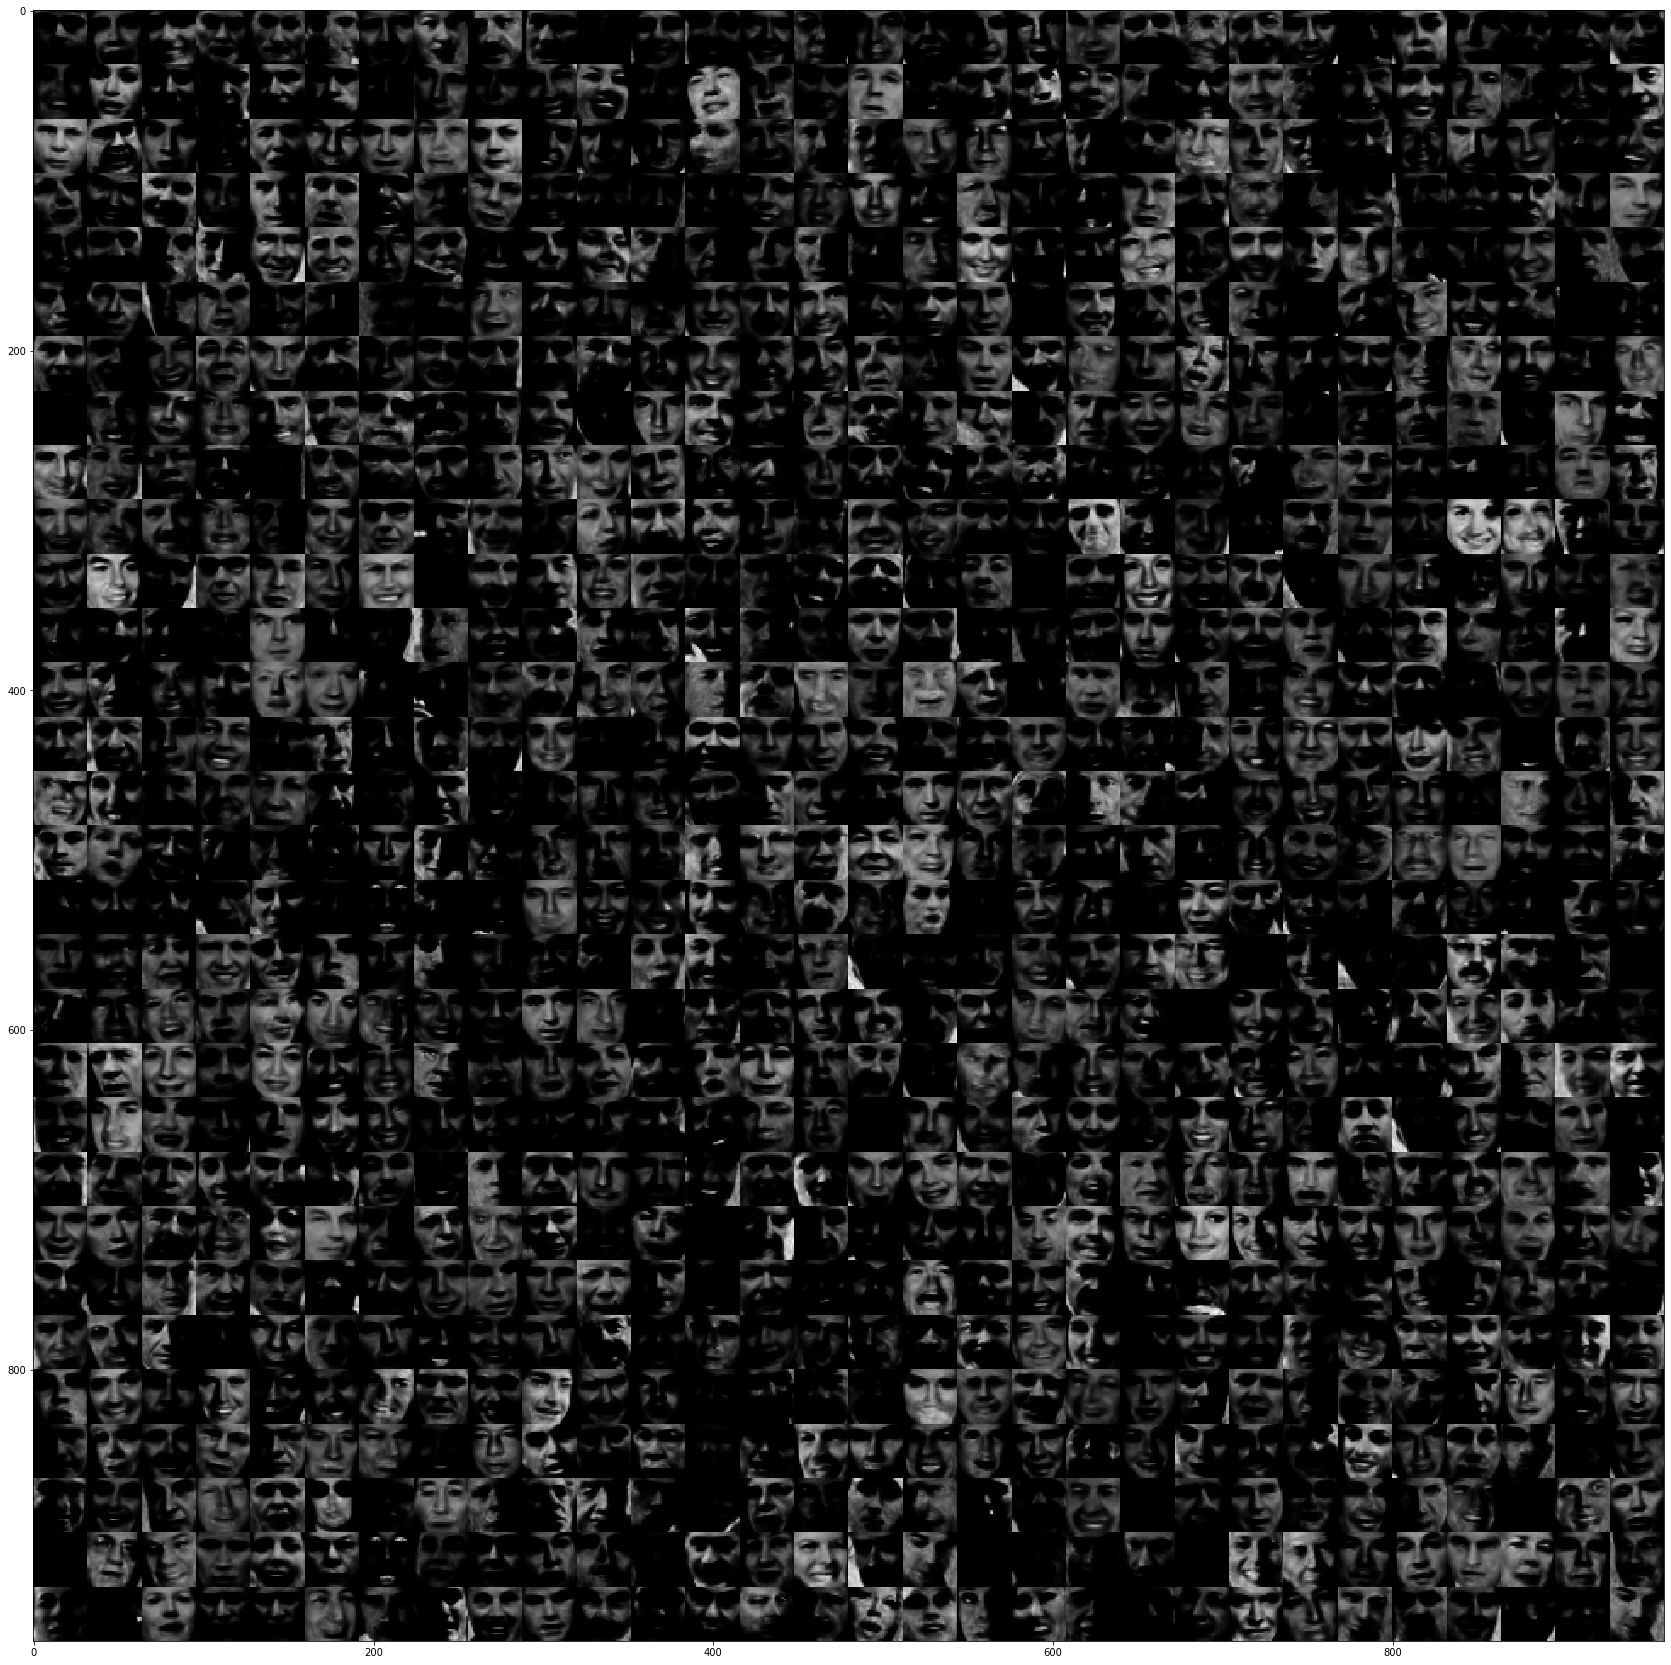

In [35]:
# Encode and decode images from test set and visualize their reconstruction.
n = 30
canvas_orig = np.empty((32 * n, 32 * n))
canvas_recon = np.empty((32 * n, 32 * n))
for i, (batch_x, _) in enumerate(train_data.take(n)):
    # Encode and decode the digit image.
    reconstructed_images = decoder(encoder(batch_x))
    # Display original images.
    for j in range(n):
        # Draw the generated digits.
        img = batch_x[j].numpy().reshape([32, 32],order='F')
        canvas_orig[i * 32:(i + 1) * 32, j * 32:(j + 1) * 32] = img
    # Display reconstructed images.
    for j in range(n):
        # Draw the generated digits.
        reconstr_img = reconstructed_images[j].numpy().reshape([32, 32],order='F')
        canvas_recon[i * 32:(i + 1) * 32, j * 32:(j + 1) * 32] = reconstr_img

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()
